<a href="https://colab.research.google.com/github/Nagmashaik123/INFO5505MachineLearning/blob/main/Shaik_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importing all the necessary Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import (make_blobs,make_circles,make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from matplotlib.image import imread
sns.set()

In [12]:
# Loading the Training data set provided and dropping the nulls if there exists any
df_train_data = pd.read_csv('/content/ALS_TrainingData_2223.csv')
df_train_data.dropna()
df_train_data.shape

(2223, 101)

In [11]:
# Loading the Test data set provided and dropping the nulls if there exists any
df_test_data = pd.read_csv('/content/ALS_TestingData_78.csv')
df_test_data.dropna()
df_test_data.shape


(78, 131)

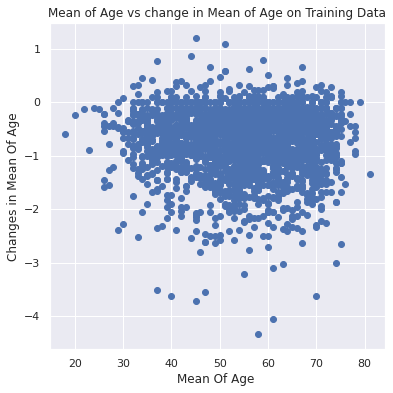

In [19]:
# Visualization of intial raw data i.e traning data
plt.figure(figsize=(6, 6))
plt.scatter(df_train_data['Age_mean'], df_train_data['ALSFRS_slope'])
plt.xlabel('Mean Of Age ')
plt.ylabel('Changes in Mean Of Age')
plt.title('Mean of Age vs change in Mean of Age on Training Data');

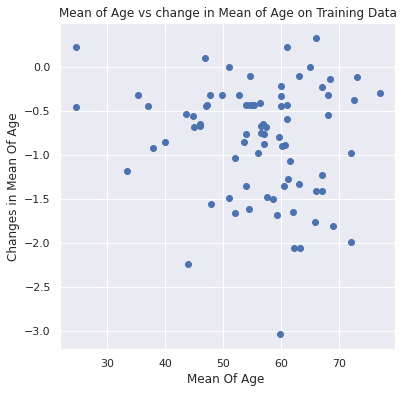

In [21]:
# Visualization of intial raw data i.e on  testing data
plt.figure(figsize=(6, 6))
plt.scatter(df_test_data['Age_mean'], df_test_data['ALSFRS_slope'])
plt.xlabel('Mean Of Age ')
plt.ylabel('Changes in Mean Of Age')
plt.title('Mean of Age vs change in Mean of Age on Training Data');

In [17]:
#pd.set_option("display.max_rows",df_train_data.shape[0]+1)
#pd.set_option("display.max_rows",df_test_data.shape[0]+1)
df_train_data.isnull().sum()
df_test_data.isnull().sum()

ID                               0
Age_mean                         0
Albumin_max                      0
Albumin_median                   0
Albumin_min                      0
                                ..
Urine.Ph_range                   0
White.Blood.Cell..WBC._max       0
White.Blood.Cell..WBC._median    0
White.Blood.Cell..WBC._min       0
White.Blood.Cell..WBC._range     0
Length: 131, dtype: int64

In [22]:
# Preparing the data for the analysis
df_std = StandardScaler().fit_transform(df_train_data)

In [ ]:
km = KMeans(n_clusters=2, max_iter=100, random_state=42)
km.fit(X_std)
centroids = km.cluster_centers_
inertia = km.inertia_
print('SSE of the based model:', inertia)

SSE of the based model: 207788.85417228265


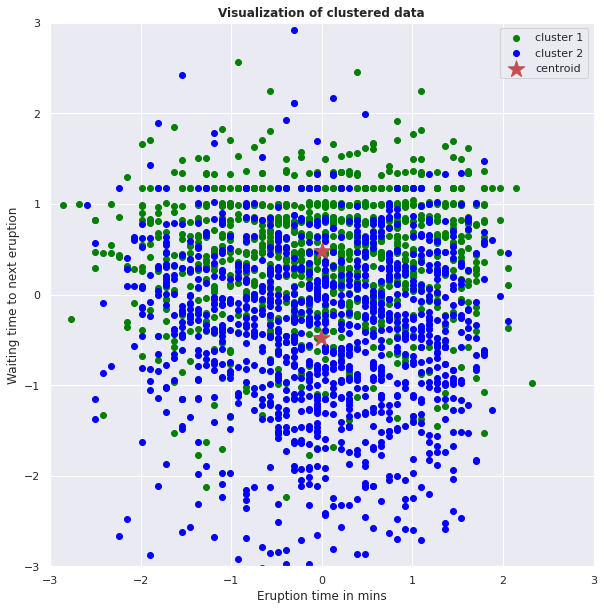

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_std[km.labels_ == 0, 1], X_std[km.labels_ == 0, 6],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 1], X_std[km.labels_ == 1, 6],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 1], centroids[:, 6], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal')

In [ ]:
corr = data_train.corrwith(data_train['ALSFRS_slope'])
cor = pd.DataFrame(corr, columns = ['score'])

In [ ]:
print('Negative correlation with ALSFRS_slope: ' )
print(cor[cor['score'] <= -0.2], '\n')

Negative correlation with ALSFRS_slope: 
                       score
Albumin_range      -0.226123
ALSFRS_Total_range -0.819305
hands_range        -0.632350
Hemoglobin_range   -0.209774
leg_range          -0.584507
mouth_range        -0.553194
onset_delta_mean   -0.324307
pulse_range        -0.236961
respiratory_range  -0.432878
trunk_range        -0.686407 



In [ ]:
print('Positive correlated with ALSFRS_slope: ' )
print(cor[cor['score'] >= 0.2])

Positive correlated with ALSFRS_slope: 
                        score
ALSFRS_slope         1.000000
ALSFRS_Total_median  0.247250
ALSFRS_Total_min     0.601810
hands_min            0.424107
leg_min              0.348967
mouth_median         0.244704
mouth_min            0.435538
respiratory_min      0.380749
trunk_min            0.488530


# **Selecting k by applying the elbow method**

In [ ]:
sse = []
list_k = list(range(1, 10))
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    sse.append(km.inertia_)

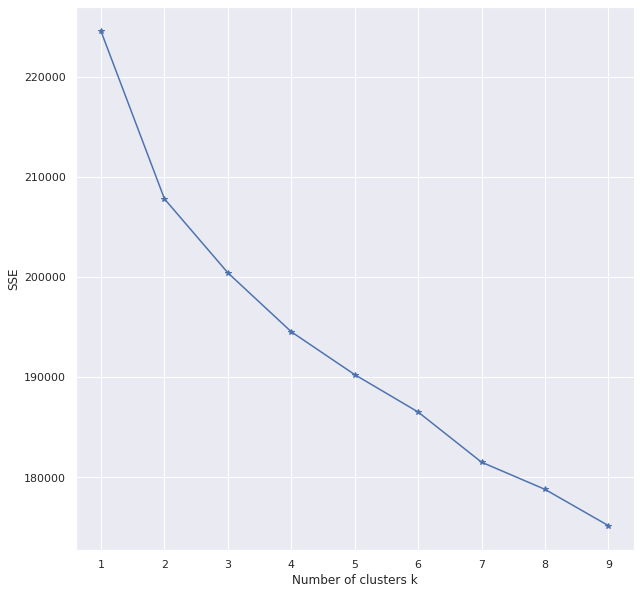

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(list_k, sse, marker = '*')
plt.xlabel('Number of clusters k')
plt.ylabel('SSE');

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), sse, curve="convex", direction="decreasing")
print(kl.elbow)

3


# **Silhouette coefficient**

In [ ]:
sil_cofs=[]
for k in range (2,11):
  kmeans_sil = KMeans(n_clusters = k)
  kmeans_sil.fit(X_std)
  sil_cof_score = silhouette_score(X_std,kmeans_sil.labels_ )
  sil_cofs.append(sil_cof_score)

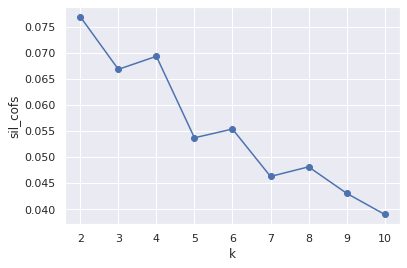

In [ ]:
x = []
for i in range(2, 11):
  x.append(i)
y=sil_cofs
plt.plot(x, y, marker='o')
plt.xticks(x)
plt.xlabel('k')
plt.ylabel('sil_cofs')
plt.show()

# **From the above two methods we can choose the K value as 3**

In [ ]:
k_accurate = KMeans(n_clusters = 3)
k_accurate.fit(X_std)
pred = k_accurate.predict(X_std)

In [ ]:
centroids  = k_accurate.cluster_centers_
print(centroids)

[[ 4.73650410e-02  6.71368936e-03  1.04787777e-01  1.59692608e-01
   2.14518654e-01 -2.09097563e-01  5.27977464e-01  6.60473400e-01
   7.80417662e-01  8.71264583e-01 -6.24479755e-01 -7.68107325e-04
   9.99875219e-02  1.62373904e-01 -1.08392688e-01  5.82283427e-02
   1.67561352e-01  2.11319199e-01 -6.33975385e-02  2.28147011e-02
   7.77057294e-02  6.25109773e-02 -1.75517103e-01  5.98139869e-02
   1.32807086e-01  1.65380880e-01 -1.75972427e-01 -3.00984351e-02
   3.23091200e-02  4.99446646e-02 -1.62248081e-01  6.51688258e-03
   5.52794970e-02  1.06860319e-01 -1.90623288e-01 -5.45774821e-02
  -1.06223184e-01 -4.34408857e-02 -9.02593227e-02  8.37533869e-02
   1.24815632e-01  1.69046176e-01 -2.27994256e-01  2.90491157e-01
   3.33378189e-01  3.87320921e-01 -1.99697419e-01  1.63804926e-01
  -7.50693673e-02 -4.46827913e-02 -3.74438021e-03 -1.45037349e-01
   4.85149053e-01  5.86696105e-01  7.12721075e-01 -4.94697884e-01
  -2.56505964e-02 -9.72754691e-03  1.73665352e-02 -2.25653926e-01
   5.03059

# **Cluster Interpretation using centroids**

In [ ]:
centroids  = k_accurate.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns = data_train.columns)
print('\t'*5, ' The Table of Centroids')
centroids_df

					  The Table of Centroids


,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,0.047365,0.006714,0.104788,0.159693,0.214519,-0.209098,0.527977,0.660473,0.780418,0.871265,-0.624480,-0.000768,0.099988,0.162374,-0.108393,0.058228,0.167561,0.211319,-0.063398,0.022815,0.077706,0.062511,-0.175517,0.059814,0.132807,0.165381,-0.175972,-0.030098,0.032309,0.049945,-0.162248,0.006517,0.055279,0.106860,-0.190623,-0.054577,-0.106223,-0.043441,-0.090259,0.083753,...,0.120441,0.174663,-0.233025,0.357357,0.471843,0.612511,-0.335168,0.302706,0.386044,0.512833,-0.534339,-0.002655,0.096800,-0.183736,-0.139526,-0.084039,0.021661,0.079696,0.085645,-0.078490,-0.268513,-0.227881,-0.171102,-0.239466,0.168518,0.337146,0.460041,-0.441255,0.038732,0.045601,0.085058,-0.200970,0.047006,0.566317,0.675780,0.793245,-0.510437,-0.103584,-0.057072,-0.024683
1,-0.028365,0.303304,-0.145777,-0.226373,-0.290652,0.416062,-1.084836,0.098191,-0.219676,-0.758042,1.222688,0.057202,-0.085666,-0.095363,0.257466,-0.005719,-0.041069,-0.037500,0.194236,0.335771,0.346142,0.319468,0.514639,0.077652,0.103993,0.081332,0.413502,-0.095999,-0.101652,-0.087741,0.324074,0.039656,-0.028143,-0.086987,0.465961,-0.052005,-0.040916,0.025369,0.145990,-0.316308,...,-0.228359,-0.263474,0.435290,0.319970,0.091346,-0.308592,0.932183,-0.670053,-0.745456,-0.926454,0.935034,0.483230,-0.583723,0.309696,0.167965,0.126221,0.059869,0.112299,0.058392,0.249260,0.396458,0.320746,0.254607,0.545625,-0.268158,-0.446172,-0.689234,0.724694,-0.109267,-0.113638,-0.157097,0.498655,-0.028954,0.334363,0.119134,-0.375776,0.990283,0.111886,0.123798,-0.009656
2,-0.043753,-0.213854,-0.040700,-0.059177,-0.088576,-0.003362,0.031643,-0.943704,-0.888260,-0.645179,0.003405,-0.037629,-0.074939,-0.151260,-0.029977,-0.073485,-0.194836,-0.255374,-0.047025,-0.257179,-0.337103,-0.298895,-0.114576,-0.131923,-0.246684,-0.274642,-0.045635,0.104846,0.025765,-0.007061,-0.003442,-0.035451,-0.054416,-0.083176,-0.061619,0.107638,0.168751,0.040565,0.021257,0.102465,...,-0.005694,-0.053996,0.015431,-0.690901,-0.688506,-0.605138,-0.184623,0.050630,-0.009125,-0.055254,0.078025,-0.322980,0.265820,0.034817,0.071854,0.026350,-0.069226,-0.181745,-0.153224,-0.064154,0.088810,0.085992,0.055256,-0.050564,-0.042668,-0.146390,-0.145410,0.096495,0.022379,0.016207,-0.006842,-0.069964,-0.042877,-0.978204,-0.978188,-0.799828,0.008943,0.062000,-0.007834,0.039313


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

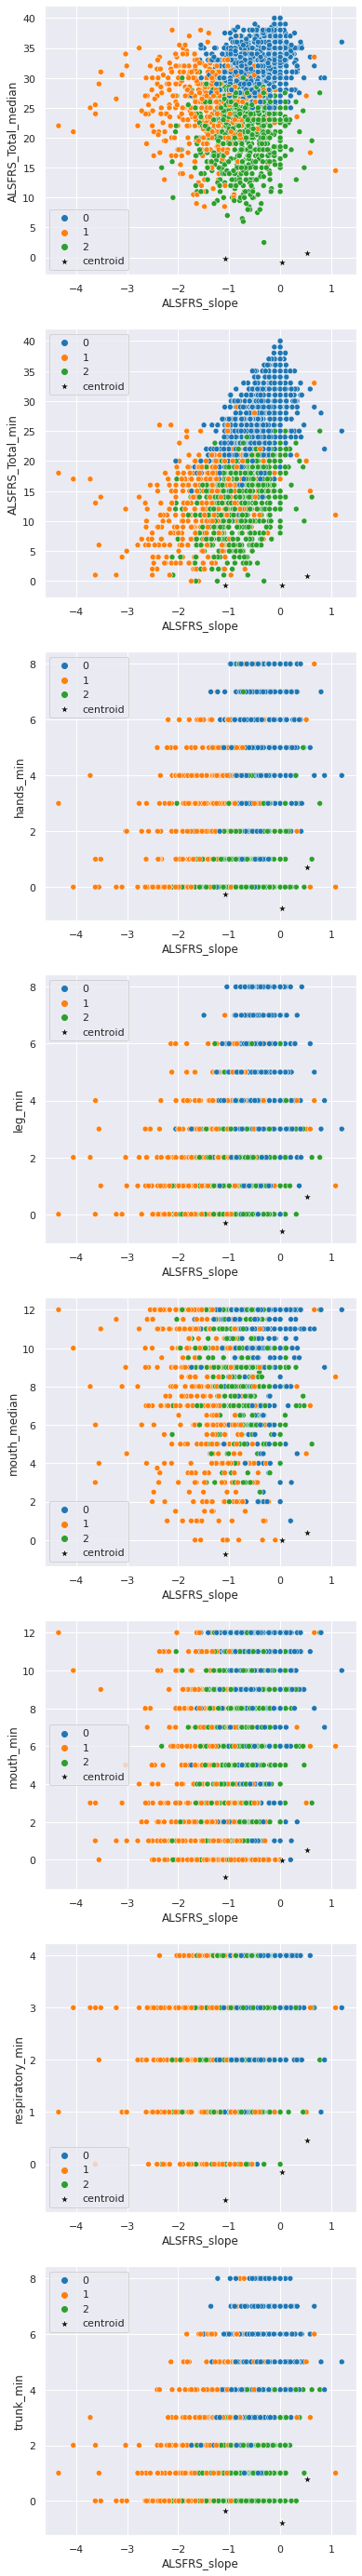

In [ ]:
data_train['cluster'] = pred

Y = ['ALSFRS_Total_median','ALSFRS_Total_min', 'hands_min',  'leg_min', 'mouth_median', 'mouth_min', 'respiratory_min', 'trunk_min']

fig, ax = plt.subplots(8,1,figsize=(6,50))
for i,y in enumerate(Y):
  sns.scatterplot ('ALSFRS_slope', y, hue = 'cluster', palette= 'tab10', data = data_train, ax=ax[i])
  sns.scatterplot ('ALSFRS_slope' , y,   color='.1', s = 100, marker="*",label = 'centroid', data = centroids_df, ax=ax[i])

# **Model validation using testing Data**

In [ ]:
X_test_std = StandardScaler().fit_transform(data_test)

In [ ]:
k_test_accurate = KMeans(n_clusters = 3)
k_test_accurate.fit(X_test_std)
test_pred = k_test_accurate.predict(X_test_std)

In [ ]:
centroids  = k_test_accurate.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns = data_test.columns)
centroids_df = centroids_df['ALSFRS_slope']
print('\t'*5, ' The Table of Centroids')
centroids_df

					  The Table of Centroids


0    0.376880
1    0.239391
2   -0.237733
Name: ALSFRS_slope, dtype: float64